In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from datetime import date
warnings.simplefilter('ignore', ConvergenceWarning)
%matplotlib inline

In [55]:
df_oil = pd.read_csv("/Users/butler/Documents/GitHub/projects/Capstone_three/data/raw/Dow_Jones_Oil_&_Gas_Historical_Data.csv")

In [56]:
df_oil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/31/2020,441.78,455.88,455.88,439.43,434.97M,-3.09%
1,01/30/2020,455.88,452.19,456.31,446.62,318.78M,0.82%
2,01/29/2020,452.19,457.24,461.58,452.08,332.96M,-1.10%
3,01/28/2020,457.24,455.09,460.21,455.09,320.22M,0.47%
4,01/27/2020,455.09,468.22,468.22,454.88,335.64M,-2.80%


In [57]:
df_oil.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2442,05/21/2010,455.33,447.38,456.05,439.19,182.43M,1.77%
2443,05/20/2010,447.39,468.61,468.61,447.20,182.59M,-4.53%
2444,05/19/2010,468.62,473.55,474.82,461.35,126.09M,-1.04%
2445,05/18/2010,473.55,477.30,487.56,471.27,116.10M,-0.79%
2446,05/17/2010,477.30,482.30,484.81,467.90,124.46M,-1.04%


In [58]:
df_oil.shape

(2447, 7)

In [59]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2447 non-null   object 
 1   Price     2447 non-null   float64
 2   Open      2447 non-null   float64
 3   High      2447 non-null   float64
 4   Low       2447 non-null   float64
 5   Vol.      2440 non-null   object 
 6   Change %  2447 non-null   object 
dtypes: float64(4), object(3)
memory usage: 133.9+ KB


In [60]:
df_oil = df_oil.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)

In [61]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2447 non-null   object 
 1   Price   2447 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.4+ KB


In [62]:
df_oil.head()

,Date,Price
0,01/31/2020,441.78
1,01/30/2020,455.88
2,01/29/2020,452.19
3,01/28/2020,457.24
4,01/27/2020,455.09


In [63]:
df_oil.isnull().value_counts()

Date   Price
False  False    2447
dtype: int64

In [64]:
df_oil['Date']= pd.to_datetime(df_oil['Date'])

In [65]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2447 non-null   datetime64[ns]
 1   Price   2447 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.4 KB


In [66]:
df_oil.tail()

,Date,Price
2442,2010-05-21,455.33
2443,2010-05-20,447.39
2444,2010-05-19,468.62
2445,2010-05-18,473.55
2446,2010-05-17,477.30


In [67]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2447 non-null   datetime64[ns]
 1   Price   2447 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.4 KB


In [68]:
df_oil = df_oil.set_index('Date')

In [69]:
df_oil.tail()

,Price
Date,
2010-05-21,455.33
2010-05-20,447.39
2010-05-19,468.62
2010-05-18,473.55
2010-05-17,477.30


In [70]:
df_oil = df_oil.sort_values(by=['Date'])

In [71]:
df_oil.head()

,Price
Date,
2010-05-17,477.30
2010-05-18,473.55
2010-05-19,468.62
2010-05-20,447.39
2010-05-21,455.33


In [72]:
df_oil.tail()

,Price
Date,
2020-01-27,455.09
2020-01-28,457.24
2020-01-29,452.19
2020-01-30,455.88
2020-01-31,441.78


In [73]:
df_2009 = pd.read_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/raw/DJUSEN_2009.csv')

In [74]:
df_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    130 non-null    object 
 1   Open    130 non-null    float64
 2   High    130 non-null    float64
 3   Low     130 non-null    float64
 4   Close   130 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


In [75]:
df_2009 = df_2009.sort_values(by='Date')

In [76]:
df_2009.head()

,Date,Open,High,Low,Close
129,07/03/2009,413.98,413.98,413.98,413.98
128,07/06/2009,408.50,408.50,408.50,408.50
127,07/07/2009,398.29,398.29,398.29,398.29
126,07/08/2009,397.69,397.69,397.69,397.69
125,07/09/2009,402.41,402.41,402.41,402.41


In [77]:
df_2009.tail()

,Date,Open,High,Low,Close
4,12/25/2009,500.61,500.61,500.61,500.61
3,12/28/2009,501.98,501.98,501.98,501.98
2,12/29/2009,498.69,498.69,498.69,498.69
1,12/30/2009,498.58,498.58,498.58,498.58
0,12/31/2009,494.01,494.01,494.01,494.01


In [78]:
df_2010 = pd.read_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/raw/DJUSEN_2010_05.csv')

In [79]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    106 non-null    object 
 1   Open    106 non-null    float64
 2   High    106 non-null    float64
 3   Low     106 non-null    float64
 4   Close   106 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [80]:
df_2010 = df_2010.sort_values(by='Date')

In [81]:
df_2010.head()

,Date,Open,High,Low,Close
105,01/04/2010,508.78,508.78,508.78,508.78
104,01/05/2010,513.25,513.25,513.25,513.25
103,01/06/2010,518.89,518.89,518.89,518.89
102,01/07/2010,517.64,517.64,517.64,517.64
101,01/08/2010,520.98,520.98,520.98,520.98


In [82]:
df_2010.tail()

,Date,Open,High,Low,Close
4,05/25/2010,444.93,444.93,444.93,444.93
3,05/26/2010,444.46,444.46,444.46,444.46
2,05/27/2010,463.13,463.13,463.13,463.13
1,05/28/2010,453.89,453.89,453.89,453.89
0,05/31/2010,453.89,453.89,453.89,453.89


In [83]:
df = pd.concat([df_2009, df_2010])

In [84]:
df.head()

,Date,Open,High,Low,Close
129,07/03/2009,413.98,413.98,413.98,413.98
128,07/06/2009,408.50,408.50,408.50,408.50
127,07/07/2009,398.29,398.29,398.29,398.29
126,07/08/2009,397.69,397.69,397.69,397.69
125,07/09/2009,402.41,402.41,402.41,402.41


In [85]:
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 129 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Open    236 non-null    float64       
 2   High    236 non-null    float64       
 3   Low     236 non-null    float64       
 4   Close   236 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.1 KB


In [87]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [88]:
df['Date'] = pd.to_datetime(df['Date'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 129 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Open    236 non-null    float64       
 2   High    236 non-null    float64       
 3   Low     236 non-null    float64       
 4   Close   236 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.1 KB


In [90]:
df = df.sort_values(by=['Date'])

In [91]:
df.drop(['High', 'Low', 'Close'], axis=1, inplace=True)

In [92]:
df.head()

,Date,Open
129,2009-07-03,413.98
128,2009-07-06,408.50
127,2009-07-07,398.29
126,2009-07-08,397.69
125,2009-07-09,402.41


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 129 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    236 non-null    datetime64[ns]
 1   Open    236 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB


In [94]:
df.set_index('Date', inplace=True)

In [95]:
df.head()

,Open
Date,
2009-07-03,413.98
2009-07-06,408.50
2009-07-07,398.29
2009-07-08,397.69
2009-07-09,402.41


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2009-07-03 to 2010-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    236 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [97]:
df.rename({'Open':'Price'}, axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2009-07-03 to 2010-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   236 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [99]:
df_oil.head()

,Price
Date,
2010-05-17,477.30
2010-05-18,473.55
2010-05-19,468.62
2010-05-20,447.39
2010-05-21,455.33


In [100]:
df_oil.drop(['2010-05-17', '2010-05-18','2010-05-19', '2010-05-20', '2010-05-21', '2010-05-24','2010-05-25', '2010-05-26', '2010-05-27', '2010-05-28'], axis=0, inplace=True)

In [102]:
df_oil.head()

,Price
Date,
2010-06-01,433.76
2010-06-02,452.37
2010-06-03,458.32
2010-06-04,442.68
2010-06-07,439.00


In [103]:
df_oil = pd.concat([df_oil, df])

In [104]:
df_oil = df_oil.sort_values(by=['Date'])

In [105]:
df_oil.head()

,Price
Date,
2009-07-03,413.98
2009-07-06,408.50
2009-07-07,398.29
2009-07-08,397.69
2009-07-09,402.41


In [107]:
y_oil = df_oil['Price'] 

<Axes: xlabel='Date'>

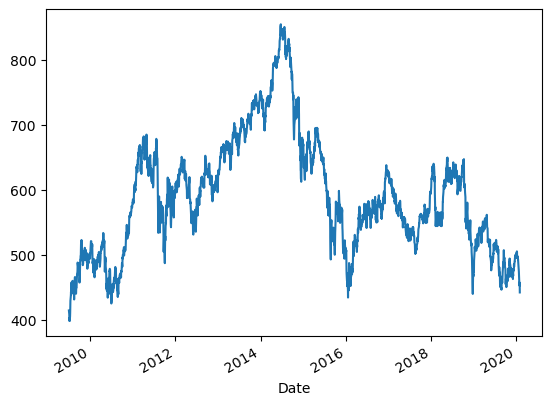

In [108]:
y_oil.plot()

In [109]:
res = adfuller(y_oil)
res

(-2.3673391956961205,
 0.15116761984427718,
 6,
 2666,
 {'1%': -3.432805216616629,
  '5%': -2.8626247313505173,
  '10%': -2.5673474394742724},
 18345.813441955044)

In [110]:
df_diff = y_oil.diff().dropna()

In [111]:
df_diff.head()

Date
2009-07-06    -5.48
2009-07-07   -10.21
2009-07-08    -0.60
2009-07-09     4.72
2009-07-10    -4.20
Name: Price, dtype: float64

In [112]:
df_diff.describe

<bound method NDFrame.describe of Date
2009-07-06    -5.48
2009-07-07   -10.21
2009-07-08    -0.60
2009-07-09     4.72
2009-07-10    -4.20
              ...  
2020-01-27   -13.13
2020-01-28     2.15
2020-01-29    -5.05
2020-01-30     3.69
2020-01-31   -14.10
Name: Price, Length: 2672, dtype: float64>

<Axes: xlabel='Date'>

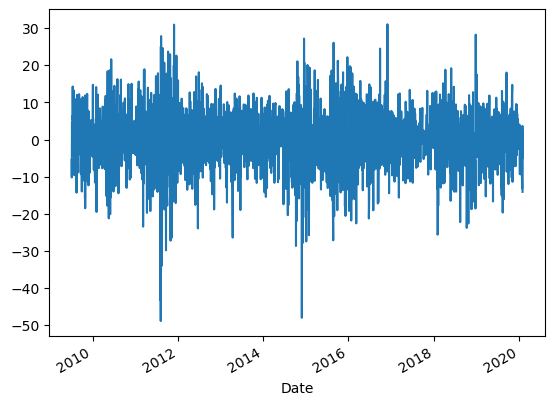

In [113]:
df_diff.plot()

In [114]:
res_diff = adfuller(df_diff)
res_diff

(-21.307269949343016,
 0.0,
 5,
 2666,
 {'1%': -3.432805216616629,
  '5%': -2.8626247313505173,
  '10%': -2.5673474394742724},
 18342.30360458642)

In [115]:
oil_log = np.log(df_oil/df_oil.shift(1))
oil_log = oil_log.dropna()

In [116]:
oil_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2672 entries, 2009-07-06 to 2020-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2672 non-null   float64
dtypes: float64(1)
memory usage: 41.8 KB


In [117]:
res_log = adfuller(oil_log)
res_log

(-21.398372390907667,
 0.0,
 5,
 2666,
 {'1%': -3.432805216616629,
  '5%': -2.8626247313505173,
  '10%': -2.5673474394742724},
 -15186.509503118054)

<Axes: xlabel='Date'>

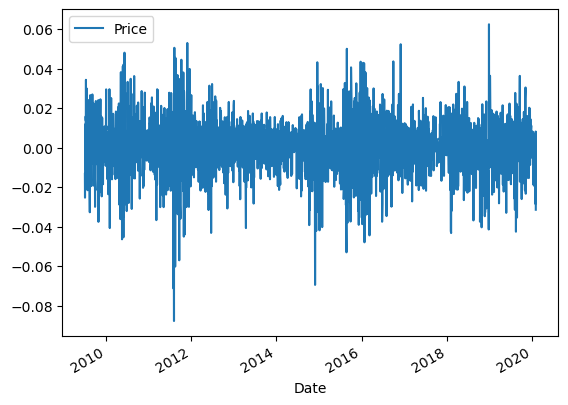

In [118]:
oil_log.plot()

### Taking the log makes little difference in the resulting statistics so using diff rather than log

In [121]:
mod = ARIMA(df_oil, order=(1, 1, 1))
res = mod.fit()

/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/butler/anaconda3/envs/Capstone_three/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting au

In [122]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2673
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9264.469
Date:                Tue, 11 Jul 2023   AIC                          18534.937
Time:                        11:50:24   BIC                          18552.609
Sample:                             0   HQIC                         18541.331
                               - 2673                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8916      0.052    -17.261      0.000      -0.993      -0.790
ma.L1          0.8608      0.058     14.820      0.000       0.747       0.975
sigma2        60.1360      1.146     52.457      0.000      57.889      62.383
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):               629.44
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Note to self: Armax with exog variables as number and sentiment of tv news day before?

In [123]:
forecast = res.get_prediction(start=-300, dynamic=True)

In [124]:
mean_forecast = forecast.predicted_mean

In [125]:
confidence_intervals = forecast.conf_int()

In [126]:
lower_limits = confidence_intervals.loc[:,'lower Price']
upper_limits = confidence_intervals.loc[:,'upper Price']

In [127]:
print(mean_forecast)

Date
2018-11-20    550.565859
2018-11-21    532.929702
2018-11-23    539.809126
2018-11-26    524.749643
2018-11-27    530.877093
                 ...    
2020-01-27    468.280827
2020-01-28    455.441662
2020-01-29    456.871114
2020-01-30    452.662950
2020-01-31    455.359316
Name: predicted_mean, Length: 300, dtype: float64


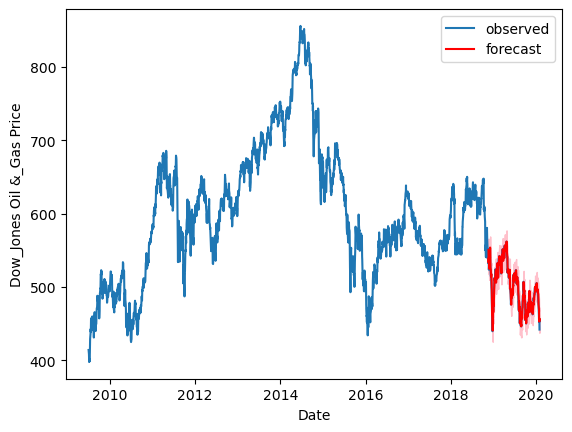

In [128]:
# plotting the df_oil data
plt.plot(df_oil.index, df_oil, label='observed')

# plotting the mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shading area between confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')


plt.xlabel('Date')
plt.ylabel('Dow_Jones Oil &_Gas Price')
plt.legend()
plt.show()

In [132]:
df_oil.to_csv('/Users/butler/Documents/GitHub/projects/Capstone_three/data/interim/DJUSEN_2009-07_to_2020_01.csv')

In [139]:
forecast = res.get_prediction(start=-25, dynamic=True)

In [140]:
mean_forecast = forecast.predicted_mean

In [141]:
confidence_intervals = forecast.conf_int()

In [142]:
lower_limits = confidence_intervals.loc[:,'lower Price']
upper_limits = confidence_intervals.loc[:,'upper Price']

In [143]:
print(mean_forecast)

Date
2019-12-26    498.919517
2019-12-27    499.232015
2019-12-30    498.953385
2019-12-31    499.201817
2020-01-02    498.980310
2020-01-03    499.177811
2020-01-06    499.001715
2020-01-07    499.158726
2020-01-08    499.018732
2020-01-09    499.143553
2020-01-10    499.032260
2020-01-13    499.131491
2020-01-14    499.043014
2020-01-15    499.121902
2020-01-16    499.051564
2020-01-17    499.114279
2020-01-21    499.058361
2020-01-22    499.108219
2020-01-23    499.063765
2020-01-24    499.103401
2020-01-27    499.068060
2020-01-28    499.099571
2020-01-29    499.071475
2020-01-30    499.096526
2020-01-31    499.074190
Name: predicted_mean, dtype: float64


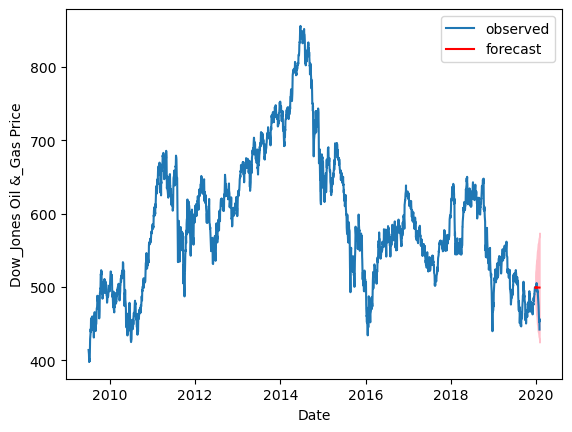

In [144]:
# plotting the df_oil data
plt.plot(df_oil.index, df_oil, label='observed')

# plotting the mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shading area between confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')


plt.xlabel('Date')
plt.ylabel('Dow_Jones Oil &_Gas Price')
plt.legend()
plt.show()